### Esercizio 1 Regressione Logistica

Partendo dal dataset al seguente link https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv relativo a campagne di marketing diretto (telefonate) di un istituto bancario portoghese, create il modello più preciso possibile per prevedere se il cliente sottoscriverà (1/0) un deposito a termine(variabile y).

#### Variabile output (obiettivo desiderato):
- y — il cliente ha sottoscritto un deposito a termine? (binario: “1”, significa “Sì”, “0” significa “No”)

1. Valutate se utilizzare tutti i paramentri o solo alcuni di essi:
2. Create il modello e addestratelo;
3. Valutate il modello;
4. Create la matrice di confusione;
5. Create un report di classificazione
6. Create i grafici

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [43]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [44]:
df.corr(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [45]:

# mapping education
education_mapping = {
    'unknown': 3,
    'basic.4y': 4,
    'university.degree': 8,
    'high.school': 7,
    'basic.9y': 5,
    'professional.course': 6,
    'basic.6y': 2,
    'illiterate': 1
}

df['education'] = df['education'].replace(education_mapping)


# mapping loan
df = df[df['loan'] != 'unknown']
loan_mapping = {
    'no': 0,
    'yes': 1
}

df['loan'] = df['loan'].replace(loan_mapping)


# mapping job
mapping_lavori = {
    "management":4,
    "admin.":8,
    "entrepreneur":3,
    "technician":7,
    "self-employed":3,
    "blue-collar":6,
    "services":4,
    "retired":5,
    "housemaid":2,
    "student":3,
    "unemployed":3,
    "unknown":0
}

df["job"] = df["job"].replace(mapping_lavori)


# mapping month
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

df['month'] = df['month'].replace(month_mapping)


# mapping day_of_week
day_mapping = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5
}

df['day_of_week'] = df['day_of_week'].replace(day_mapping)



df = df[df['poutcome'] != 'nonexistent']
# mapping poutcome
poutcome_mapping = {
    'failure': 0,
    'success': 1
}

df['poutcome'] = df['poutcome'].replace(poutcome_mapping)



# mapping housing
df = df[df['housing'] != 'unknown']

housing_mapping = {
    'no': 0,
    'yes': 1
}

df['housing'] = df['housing'].replace(housing_mapping)



# mapping contact
contact_mapping = {
    'cellular': 1,
    'telephone': 0,
}

df['contact'] = df['contact'].replace(contact_mapping)


# marital mapping
marital_mapping = {
    'married': 3,
    'single': 2,
    'divorced': 1,
    'unknown': 0
}

df['marital'] = df['marital'].replace(marital_mapping)


# mapping default
df = df[df['default'] != 'unknown']

default_mapping = {
    'no': 0,
    'yes': 1
}

df['default'] = df['default'].replace(default_mapping)


C:\Users\39334\AppData\Local\Temp\ipykernel_9080\2792892183.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace(education_mapping)
C:\Users\39334\AppData\Local\Temp\ipykernel_9080\2792892183.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan'] = df['loan'].replace(loan_mapping)
C:\Users\39334\AppData\Local\Temp\ipykernel_9080\2792892183.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, expl

In [46]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

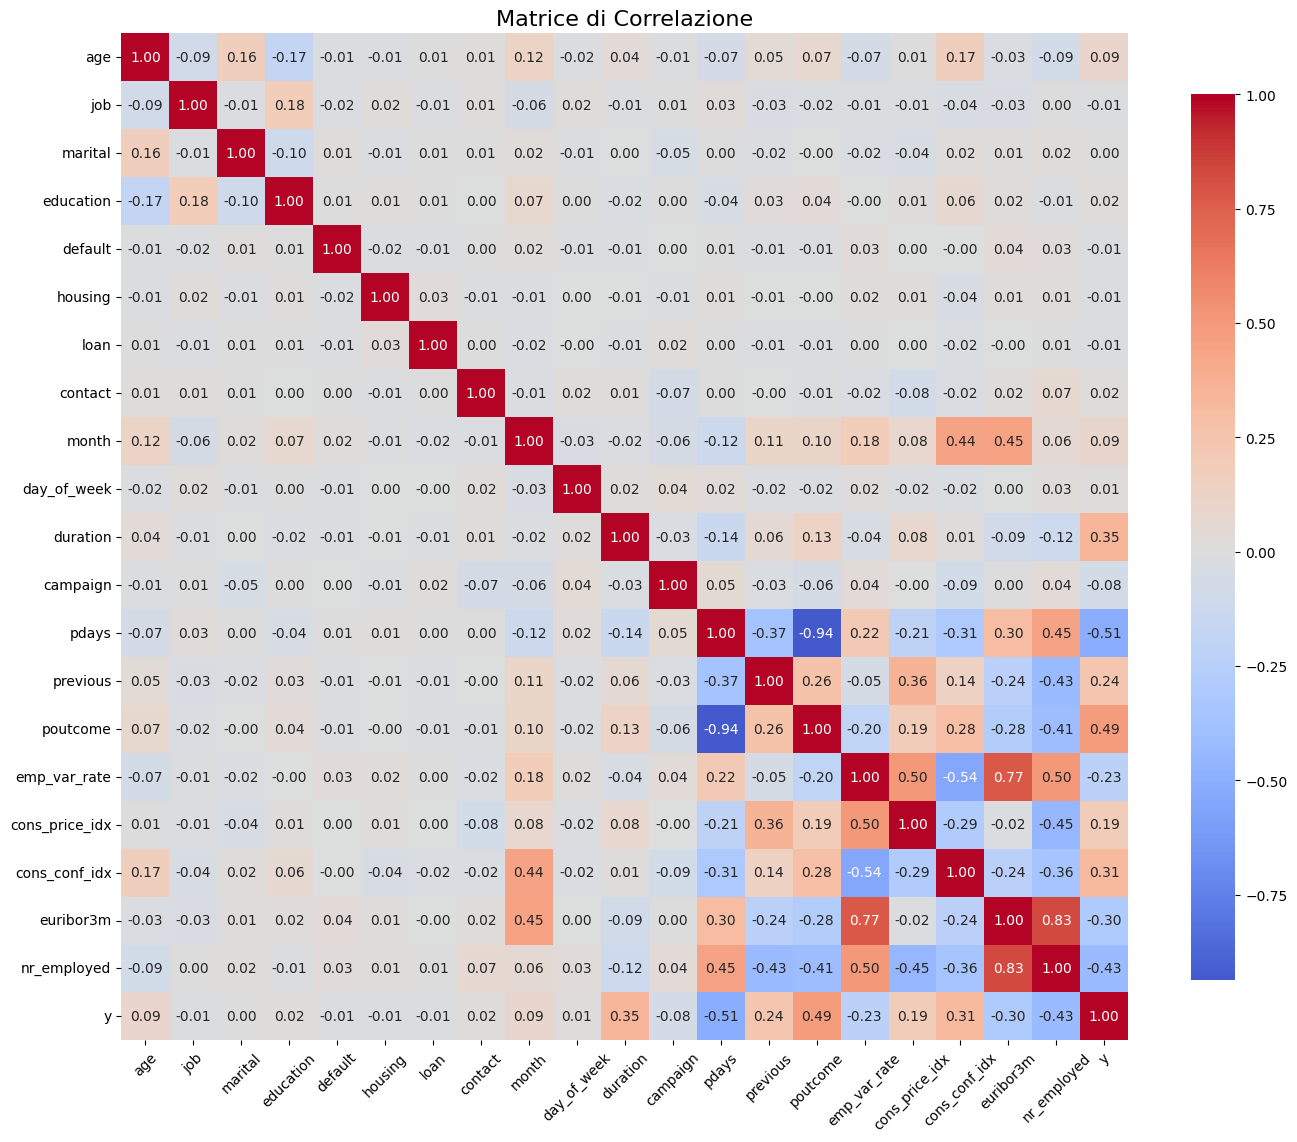

In [47]:
import seaborn as sns

corr_matrix = df.corr()

# Plot della matrice di correlazione
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, 
            annot=True,        # Mostra i numeri
            fmt=".2f",         # Decimali
            cmap='coolwarm',   # Colori
            center=0,          # Colori centrati sullo zero
            square=True,       # Celle quadrate
            cbar_kws={"shrink": 0.8})  # Barra colore

plt.title("Matrice di Correlazione", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [57]:
df['default'].value_counts()

default
0    4923
1       1
Name: count, dtype: int64

In [58]:
df['contact'].value_counts()

contact
1    4560
0     364
Name: count, dtype: int64

In [68]:
df['marital'].value_counts()

marital
3    2651
2    1717
1     538
0      18
Name: count, dtype: int64

In [88]:
#X = df[["pdays","nr_employed","day_of_week","month","job"]]
X = df[["pdays","nr_employed","day_of_week","month","job","housing"]]
#X = df[["pdays","nr_employed","day_of_week","month","job","housing","marital"]]
#X = df[["pdays","nr_employed","day_of_week","month","job","housing","contact","marital"]]
#X = df[["pdays","nr_employed","day_of_week","month","job","housing","contact","marital","default"]]
y = df['y']

In [89]:
X.shape

(4924, 6)

In [90]:
y.shape

(4924,)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [92]:
model = LogisticRegression(solver = 'liblinear', random_state = 1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [93]:
from sklearn.metrics import classification_report, confusion_matrix

p_pred = model.predict_proba(X_test)
y_pred = model.predict(X_test)

score_ = model.score(X_test, y_test)

conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [94]:
print('Intercept:', model.intercept_)
print('Coef:', model.coef_, end='\n\n')
print('Classi:', model.classes_)

Intercept: [0.0033266]
Coef: [[-2.36113230e-03 -3.10176740e-05  7.07829367e-02  5.32820630e-02
   1.94303275e-02 -1.22928304e-03]]

Classi: [0 1]


In [95]:
print('score_:', score_, end='\n\n')

print('conf_m:', conf_m, sep='\n', end='\n\n')

print('report:', report, sep='\n')

score_: 0.8042242079610074

conf_m:
[[739 127]
 [114 251]]

report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       866
           1       0.66      0.69      0.68       365

    accuracy                           0.80      1231
   macro avg       0.77      0.77      0.77      1231
weighted avg       0.81      0.80      0.81      1231



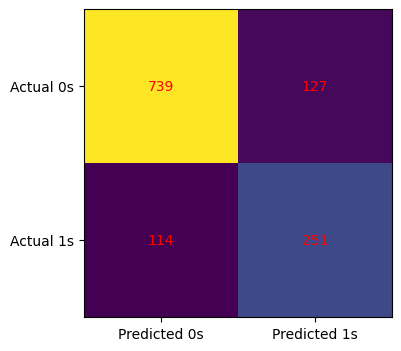

In [96]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(conf_m)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_m[i, j], ha='center', va='center', color='red')
plt.show()